In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

In [3]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [4]:
dfBikes = pd.read_csv('https://kanaries-app.s3.ap-northeast-1.amazonaws.com/public-datasets/bike_sharing_dc.csv', parse_dates=['date'])
dfBikes

,date,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
0,2011-01-01,1,winter,0,2011,no,3.28,3.0014,81.0,0.0000,3,13,16,0,am,6
1,2011-01-01,1,winter,1,2011,no,2.34,1.9982,80.0,0.0000,8,32,40,0,am,6
2,2011-01-01,1,winter,2,2011,no,2.34,1.9982,80.0,0.0000,5,27,32,0,am,6
3,2011-01-01,1,winter,3,2011,no,3.28,3.0014,75.0,0.0000,3,10,13,0,am,6
4,2011-01-01,1,winter,4,2011,no,3.28,3.0014,75.0,0.0000,0,1,1,0,am,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,12,winter,19,2012,no,4.22,1.0016,60.0,11.0014,11,108,119,1,pm,1
17375,2012-12-31,12,winter,20,2012,no,4.22,1.0016,60.0,11.0014,8,81,89,1,pm,1
17376,2012-12-31,12,winter,21,2012,no,4.22,1.0016,60.0,11.0014,7,83,90,1,pm,1
17377,2012-12-31,12,winter,22,2012,no,4.22,1.9982,56.0,8.9981,13,48,61,1,pm,1


In [5]:
dfBikes.dtypes

date               datetime64[ns]
month                       int64
season                     object
hour                        int64
year                        int64
holiday                    object
temperature               float64
feeling_temp              float64
humidity                  float64
winspeed                  float64
casual                      int64
registered                  int64
count                       int64
work yes or not             int64
am or pm                   object
Day of the week             int64
dtype: object

In [6]:
estacion = dfBikes.groupby('season').size().index
estacion

Index(['fall', 'spring', 'summer', 'winter'], dtype='object', name='season')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
codificador = LabelEncoder()
dfBikes['season'] = codificador.fit_transform(dfBikes['season'])
dfBikes['holiday'] = codificador.fit_transform(dfBikes['holiday'])
dfBikes['am or pm'] = codificador.fit_transform(dfBikes['am or pm'])
dfBikes

,date,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
0,2011-01-01,1,3,0,2011,0,3.28,3.0014,81.0,0.0000,3,13,16,0,0,6
1,2011-01-01,1,3,1,2011,0,2.34,1.9982,80.0,0.0000,8,32,40,0,0,6
2,2011-01-01,1,3,2,2011,0,2.34,1.9982,80.0,0.0000,5,27,32,0,0,6
3,2011-01-01,1,3,3,2011,0,3.28,3.0014,75.0,0.0000,3,10,13,0,0,6
4,2011-01-01,1,3,4,2011,0,3.28,3.0014,75.0,0.0000,0,1,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,12,3,19,2012,0,4.22,1.0016,60.0,11.0014,11,108,119,1,1,1
17375,2012-12-31,12,3,20,2012,0,4.22,1.0016,60.0,11.0014,8,81,89,1,1,1
17376,2012-12-31,12,3,21,2012,0,4.22,1.0016,60.0,11.0014,7,83,90,1,1,1
17377,2012-12-31,12,3,22,2012,0,4.22,1.9982,56.0,8.9981,13,48,61,1,1,1


In [9]:
train, test = train_test_split(dfBikes, test_size=0.4, stratify=dfBikes['season'], random_state=10)

In [10]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10427 entries, 9301 to 4245
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             10427 non-null  datetime64[ns]
 1   month            10427 non-null  int64         
 2   season           10427 non-null  int64         
 3   hour             10427 non-null  int64         
 4   year             10427 non-null  int64         
 5   holiday          10427 non-null  int64         
 6   temperature      10427 non-null  float64       
 7   feeling_temp     10427 non-null  float64       
 8   humidity         10427 non-null  float64       
 9   winspeed         10427 non-null  float64       
 10  casual           10427 non-null  int64         
 11  registered       10427 non-null  int64         
 12  count            10427 non-null  int64         
 13  work yes or not  10427 non-null  int64         
 14  am or pm         10427 non-null  int64   

None

In [11]:
display(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6952 entries, 3550 to 7593
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             6952 non-null   datetime64[ns]
 1   month            6952 non-null   int64         
 2   season           6952 non-null   int64         
 3   hour             6952 non-null   int64         
 4   year             6952 non-null   int64         
 5   holiday          6952 non-null   int64         
 6   temperature      6952 non-null   float64       
 7   feeling_temp     6952 non-null   float64       
 8   humidity         6952 non-null   float64       
 9   winspeed         6952 non-null   float64       
 10  casual           6952 non-null   int64         
 11  registered       6952 non-null   int64         
 12  count            6952 non-null   int64         
 13  work yes or not  6952 non-null   int64         
 14  am or pm         6952 non-null   int64    

None

In [12]:
train.describe()

,date,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
count,10427,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000,10427.000000
mean,2012-01-01 02:47:14.564112384,6.526805,1.493910,11.576772,2011.500336,0.027429,15.329706,15.360345,62.724657,12.717592,35.555769,153.231227,188.786995,0.853841,0.465522,2.994150
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,2011.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2011-07-04 00:00:00,4.000000,1.000000,6.000000,2011.000000,0.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000,1.000000,0.000000,1.000000
50%,2012-01-01 00:00:00,7.000000,1.000000,12.000000,2012.000000,0.000000,15.500000,15.996800,63.000000,11.001400,17.000000,114.000000,140.000000,1.000000,0.000000,3.000000
75%,2012-06-30 00:00:00,10.000000,2.000000,18.000000,2012.000000,0.000000,23.020000,24.999200,78.000000,16.997900,48.000000,218.500000,280.000000,1.000000,1.000000,5.000000
max,2012-12-31 00:00:00,12.000000,3.000000,23.000000,2012.000000,1.000000,39.000000,46.997000,100.000000,54.002000,367.000000,885.000000,976.000000,1.000000,1.000000,6.000000
std,NaN,3.440337,1.112352,6.933692,0.500024,0.163337,9.061632,11.368995,19.183287,8.123810,48.888743,151.702694,181.342968,0.353282,0.498834,2.012541


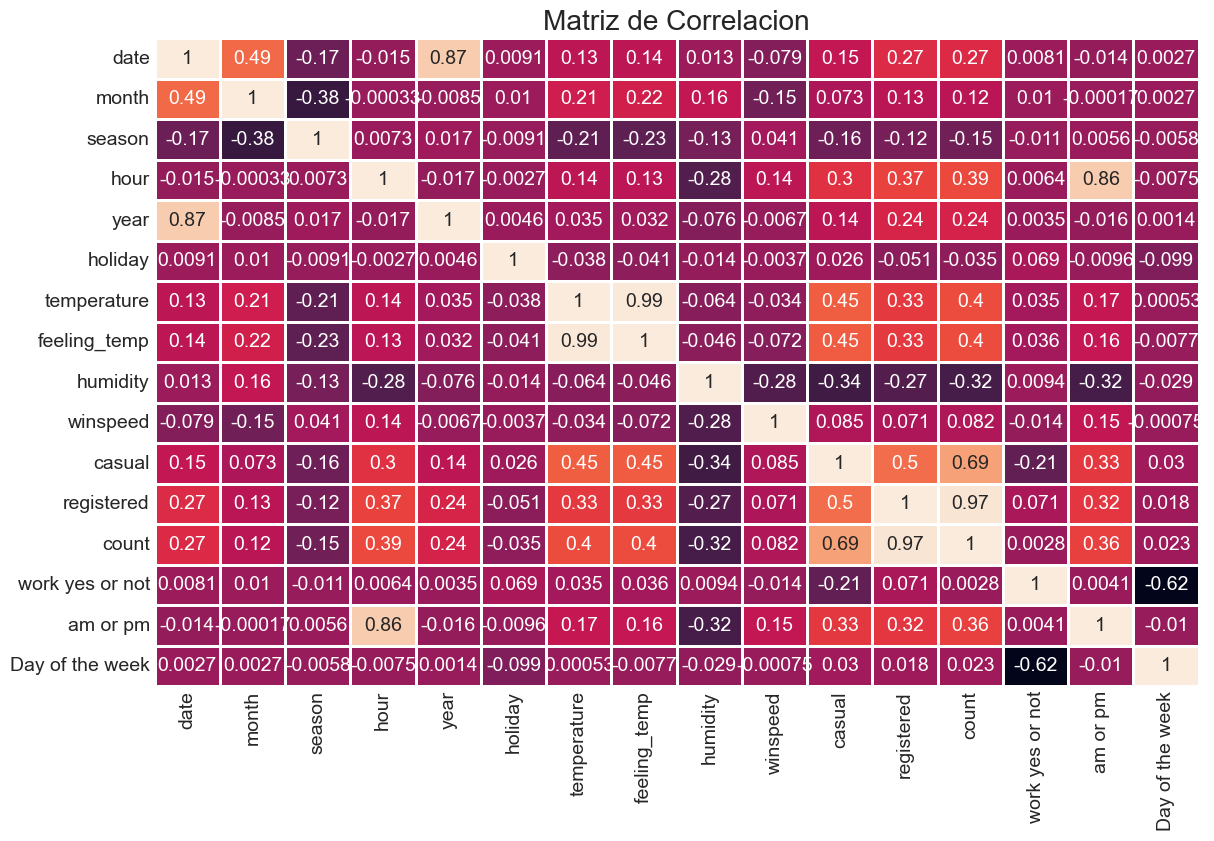

In [13]:
matriz = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(matriz, annot=True, cbar=False, linewidths=1)
plt.title('Matriz de Correlacion')
plt.show()

In [14]:
display(train['season'].value_counts())

season
2    2641
1    2639
0    2595
3    2552
Name: count, dtype: int64

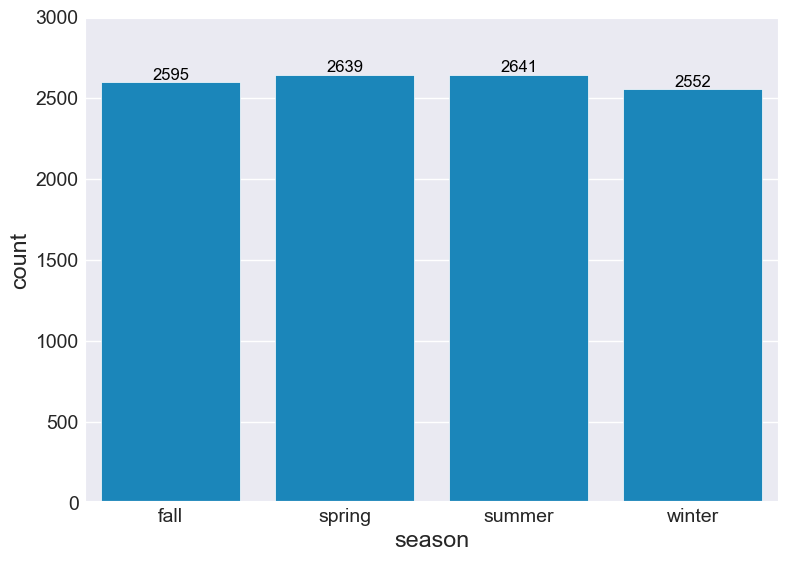

In [15]:
sns.color_palette('hls', 8)
plt.figure(figsize=(8,6))
sns. countplot(x='season', data=train)
# Extraer el eje del gráfico
ax = plt.gca()
# Modificar las dimensiones del gráfico
ymax = train['season'].value_counts().max()
ax.set_ylim(0,3000)
# Agregar la etiqueta para la serie de datos en X
ax.set_xticklabels(estacion)
# Recorrer X para obtener los valores y modificar el aspecto del gráfico
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=12, color='black', ha='center', va='bottom')

### Agrupación por fecha y hora

In [16]:
# Convertir la fecha en el indice de la tabla
train = train.set_index('date')
train

,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
date,,,,,,,,,,,,,,,
2012-01-28,1,3,11,2012,0,6.10,3.9980,56.0,8.9981,55,241,296,0,0,6
2011-07-06,7,2,7,2011,0,25.84,30.0020,79.0,0.0000,24,288,312,1,0,3
2011-04-14,4,1,22,2011,0,14.56,15.0002,55.0,7.0015,22,82,104,1,1,4
2012-02-13,2,3,0,2012,0,-1.42,-6.9976,46.0,15.0013,0,9,9,1,0,1
2012-10-08,10,0,14,2012,1,11.74,11.9972,58.0,7.0015,121,299,420,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-10,8,2,14,2011,0,31.48,32.0018,34.0,22.0028,62,116,178,1,1,3
2011-09-08,9,0,8,2011,0,21.14,20.0030,94.0,8.9981,7,188,195,1,0,4
2012-09-27,9,0,19,2012,0,23.02,24.9992,65.0,8.9981,48,511,559,1,1,4


In [17]:
test = test.set_index('date')
test

,month,season,hour,year,holiday,temperature,feeling_temp,humidity,winspeed,casual,registered,count,work yes or not,am or pm,Day of the week
date,,,,,,,,,,,,,,,
2011-06-01,6,2,20,2011,0,26.78,30.9986,79.0,16.9979,23,233,256,1,1,3
2012-05-25,5,1,23,2012,0,23.02,24.0026,78.0,15.0013,34,132,166,1,1,5
2012-05-20,5,1,2,2012,0,18.32,18.9998,52.0,0.0000,36,62,98,1,0,0
2012-10-26,10,0,17,2012,0,18.32,18.9998,76.0,12.9980,125,692,817,1,1,5
2011-10-05,10,0,3,2011,0,13.62,13.9970,82.0,7.0015,1,5,6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-26,12,3,16,2011,1,8.92,5.9978,43.0,19.0012,28,69,97,1,1,1
2012-04-16,4,1,5,2012,1,17.38,18.0032,77.0,15.0013,4,34,38,1,0,1
2011-10-01,10,0,9,2011,0,10.80,11.0006,82.0,23.9994,17,112,129,0,0,6


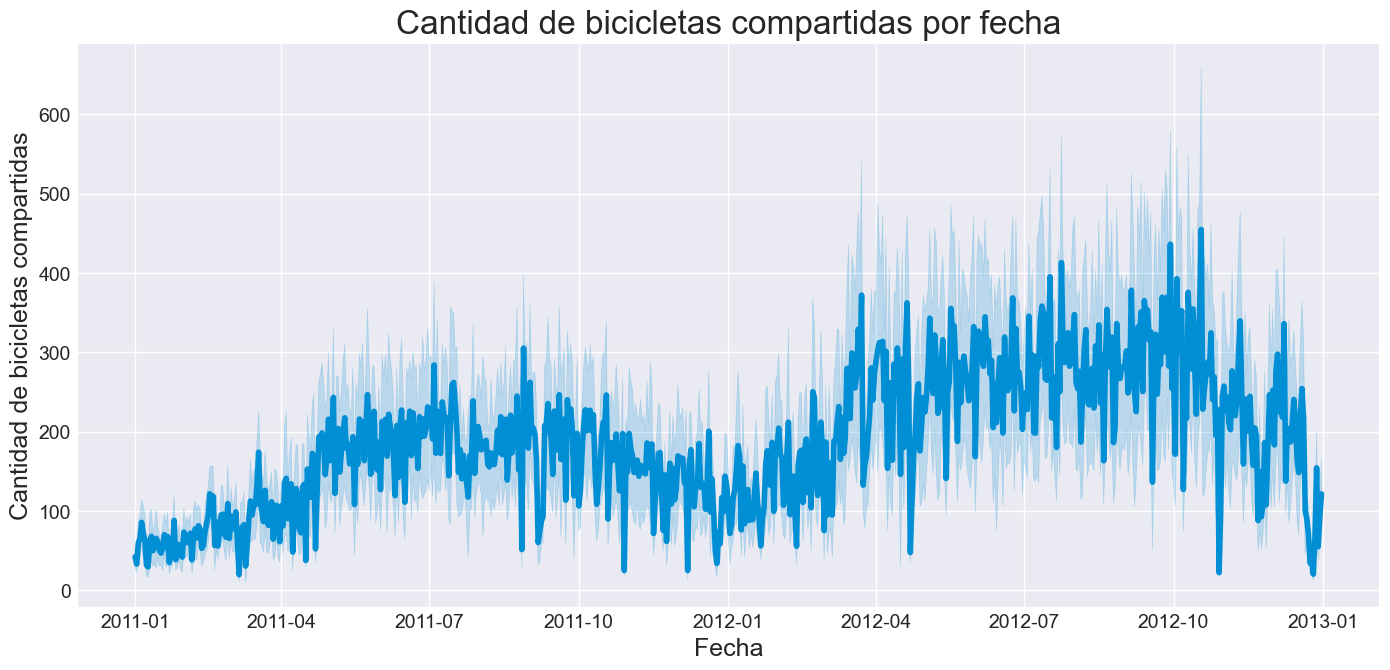

In [18]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='date', y='count', data=train)
ax.set_title('Cantidad de bicicletas compartidas por fecha', fontsize=24)
ax.set_xlabel('Fecha', fontsize=18)
ax.set_ylabel('Cantidad de bicicletas compartidas', fontsize=18)
plt.show()

In [19]:
train_month = pd.DataFrame(train.groupby(['year', 'month'])['count'].sum())
train_month

count
year month        
2011 1       23887
     2       29745
     3       38355
     4       58049
     5       84609
     6       79970
     7       81950
     8       86994
     9       76996
     10      82135
     11      60295
     12      53333
2012 1       55675
     2       63296
     3       94500
     4      104817
     5      120847
     6      119033
     7      123509
     8      124961
     9      125217
     10     114226
     11      91583
     12      74500

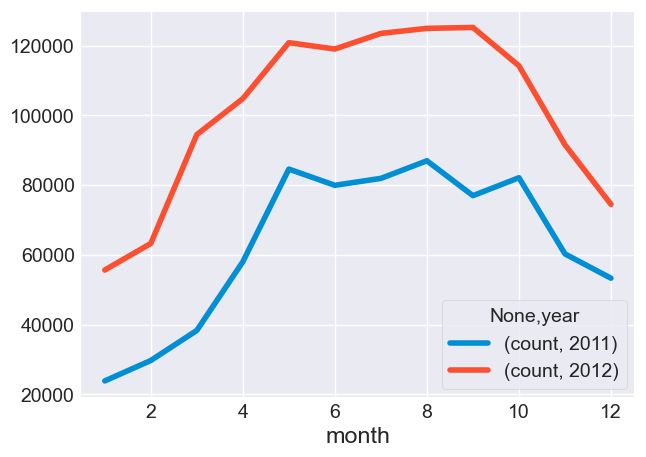

In [20]:
train_month.unstack(0).plot();

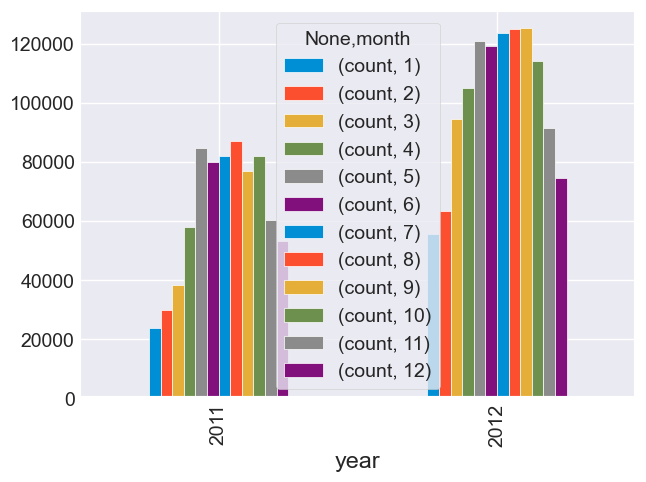

In [21]:
train_month.unstack(-1).plot(kind='bar');

In [22]:
train_month_h = pd.DataFrame(train.groupby(['year', 'month', 'am or pm'])['count'].sum())
train_month_h

count
year month am or pm       
2011 1     0          8858
           1         15029
     2     0         11252
           1         18493
     3     0         13802
           1         24553
     4     0         19487
           1         38562
     5     0         28229
           1         56380
     6     0         26605
           1         53365
     7     0         26699
           1         55251
     8     0         29865
           1         57129
     9     0         26702
           1         50294
     10    0         29050
           1         53085
     11    0         22775
           1         37520
     12    0         21050
           1         32283
2012 1     0         23214
           1         32461
     2     0         25633
           1         37663
     3     0         31425
           1         63075
     4     0         38252
           1         66565
     5     0         43582
           1         77265
     6     0         43382
           1         75651
     7     0         43399
           1         80110
     8     0         45949
           1         79012
     9     0         47185
           1         78032
     10    0         42524
           1         71702
     11    0         35554
           1         56029
     12    0         29829
           1         44671

<Axes: xlabel='year,am or pm'>

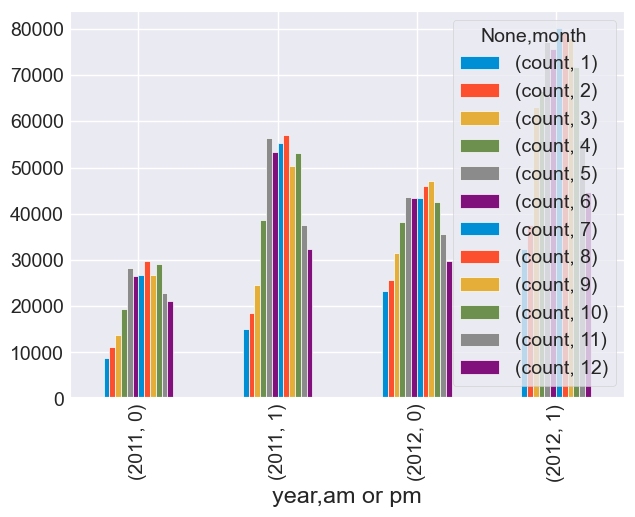

In [23]:
train_month_h.unstack(1).plot(kind='bar')

In [24]:
train_month = pd.DataFrame(train.groupby(['year', 'month'])['count'].sum())
train_month

count
year month        
2011 1       23887
     2       29745
     3       38355
     4       58049
     5       84609
     6       79970
     7       81950
     8       86994
     9       76996
     10      82135
     11      60295
     12      53333
2012 1       55675
     2       63296
     3       94500
     4      104817
     5      120847
     6      119033
     7      123509
     8      124961
     9      125217
     10     114226
     11      91583
     12      74500